In [8]:

import pandas as pd
import numpy as np

import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

### Data exploration and plotting

In [10]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [11]:
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

#### For the "Median value of owner-occupied homes" provide a boxplot

Text(0, 0.5, 'Value')

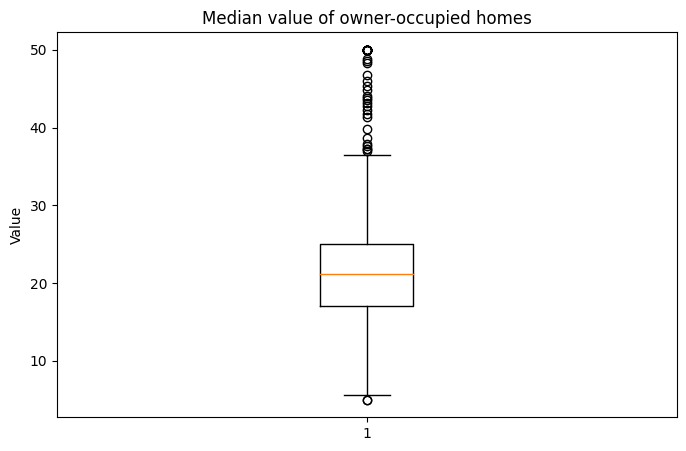

In [12]:
fig = plt.figure(figsize =(8, 5))

ax = fig.add_subplot(111)
ax.boxplot(boston_df['MEDV'])

ax.set_title('Median value of owner-occupied homes')
ax.set_ylabel('Value')

#### Provide a  bar plot for the Charles river variable

Text(0, 0.5, 'Count')

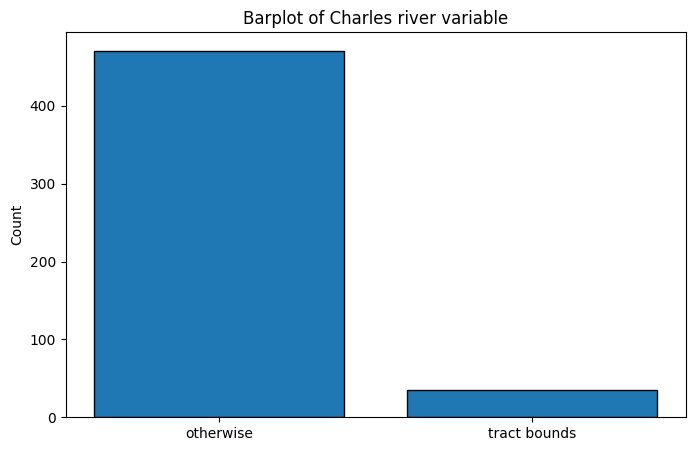

In [13]:
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
fig = plt.figure(figsize =(8, 5))

ax = fig.add_subplot(111)
counts = boston_df['CHAS'].value_counts()
ax.bar(['otherwise', 'tract bounds'], counts, edgecolor='black')

ax.set_title('Barplot of Charles river variable')
ax.set_ylabel('Count')

In [14]:
boston_df['CHAS'].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

#### Provide a boxplot for the MEDV variable vs the AGE variable. 
(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)



In [15]:
# MEDV - Median value of owner-occupied homes in $1000's
# AGE - proportion of owner-occupied units built prior to 1940

# Discretize the age variable into three groups of 
# - 35 years and younger
# - between 35 and 70 years
# - 70 years and older
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [16]:
boston_df[['AGE','age_group']].head()

,AGE,age_group
0,65.2,between 35 and 70 years
1,78.9,70 years and older
2,61.1,between 35 and 70 years
3,45.8,between 35 and 70 years
4,54.2,between 35 and 70 years


Plot the boxplot

Text(0.5, 0, 'Age Group')

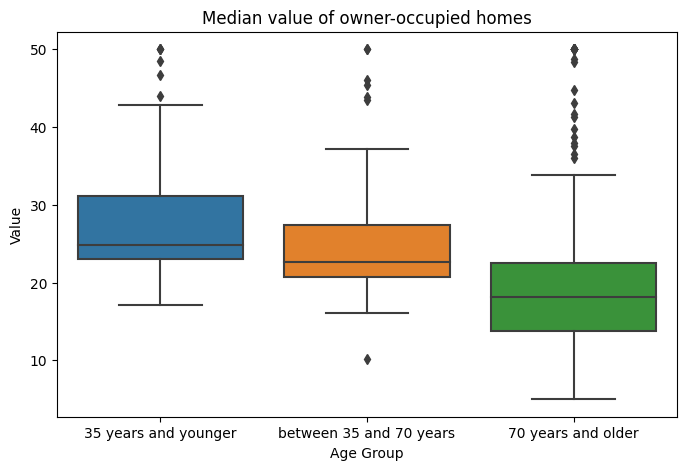

In [17]:
fig = plt.figure(figsize =(8, 5))

ax = fig.add_subplot(111)
ax = sns.boxplot(data=boston_df, x='age_group', y='MEDV',
                 order=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

ax.set_title('Median value of owner-occupied homes')
ax.set_ylabel('Value')
ax.set_xlabel('Age Group')

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0, 0.5, 'INDUS')

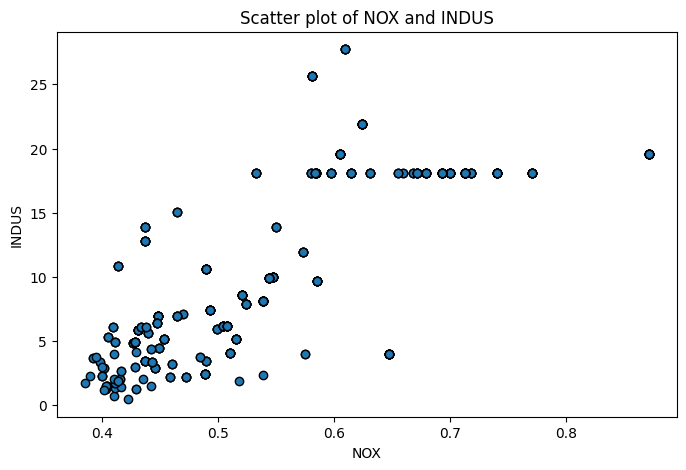

In [18]:
# INDUS - proportion of non-retail business acres per town.
# NOX - nitric oxides concentration (parts per 10 million)

fig = plt.figure(figsize =(8, 5))

ax = fig.add_subplot(111)
ax.scatter(boston_df['NOX'], boston_df['INDUS'], edgecolor='black')

ax.set_title('Scatter plot of NOX and INDUS')
ax.set_xlabel('NOX')
ax.set_ylabel('INDUS')

There seems to be an upward trend in the relationship between NOX and INDUS.
(more concentration of NOX when there are more non-retail business acres per town.

#### Create a histogram for the pupil to teacher ratio variable

In [19]:
# PTRATIO - pupil-teacher ratio by town
boston_df['PTRATIO'].head()

0    15.3
1    17.8
2    17.8
3    18.7
4    18.7
Name: PTRATIO, dtype: float64

Text(0, 0.5, 'Frequency')

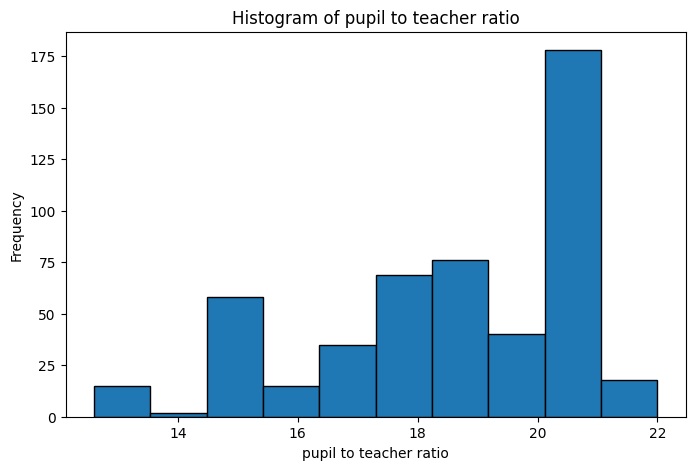

In [20]:
fig = plt.figure(figsize =(8, 5))

ax = fig.add_subplot(111)
ax.hist(boston_df['PTRATIO'], edgecolor='black')
# ax.hist(boston_df['PTRATIO'], bins=10, edgecolor='black')

ax.set_title('Histogram of pupil to teacher ratio')
ax.set_xlabel('pupil to teacher ratio')
ax.set_ylabel('Frequency')


### Q1) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

##### Hypothesis 
H0: There is <b>no difference</b> in <i> median value of houses </i> between <i> houses bounded / not bounded by Charles river </i>.<br>
Ha: There <b>are differences</b> in <i> median value of houses </i> between <i> houses bounded / not bounded by Charles river </i>.

α = 0.05

<b> Perform Levene's Test <b>

Need to determine if MEDV and CHAS shares the same variance or not using Levene's Test

H0: The two variable's variance are equal <br>
H1: The two variable's variance are not equal <br>
Let α = 0.05

In [21]:
# MEDV - Median value of owner-occupied homes in $1000's
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since pvalue=0.003 (Less than α), we reject the Null Hypothesis and can conclude that the two variable's variance are not equal.<br>
We can now test with T-test method using the equal_var = False

In [22]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

#### Answer) Since pvalue=0.003 (Less than α), we reject the initial Null Hypothesis and can conclude there is difference in the <i> median value of houses </i> between <i> houses bounded / not bounded by Charles river </i>.<br>

Below are some exploration plots to see the difference in the two.

Text(0.5, 0, 'Near Charles River')

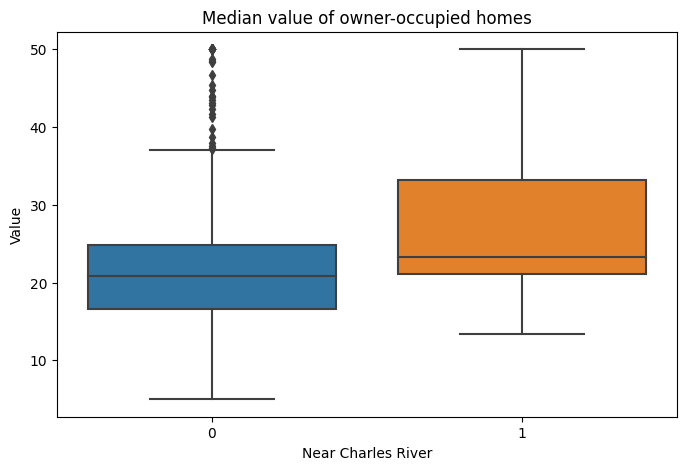

In [23]:
fig = plt.figure(figsize =(8, 5))

ax = fig.add_subplot(111)
ax = sns.boxplot(data=boston_df, x='CHAS', y='MEDV',
                 order=[0, 1])

ax.set_title('Median value of owner-occupied homes')
ax.set_ylabel('Value')
ax.set_xlabel('Near Charles River')

### Q2) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

##### Hypothesis 
H0: There is <b>no difference</b> in <i> median value of houses </i> in each age group of the <i> proportion of owner-occupied units built prior to 1940 </i>.<br>
Ha: There is <b>are differences</b> in <i> median value of houses </i> in each age group of the <i> proportion of owner-occupied units built prior to 1940 </i>.<br>

α = 0.05

In [24]:
boston_df['age_group'].value_counts()

age_group
70 years and older         287
between 35 and 70 years    128
35 years and younger        91
Name: count, dtype: int64

Since there are more than two group to test, we will use ANOVA to test the hypothesis

In [25]:
f_stat, p_value = scipy.stats.f_oneway(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                                       boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                                       boston_df[boston_df['age_group'] == '70 years and older']['MEDV'],)
print("F Stat:", f_stat)
print("P-Value:", p_value)

F Stat: 36.40764999196599
P-Value: 1.7105011022702984e-15


#### Answer) Since p value is less than α (0.05), we reject the initial Null Hypothesis and can conclude there is difference in the <i> median value of houses </i> in each age group of the <i> proportion of owner-occupied units built prior to 1940 </i>.<br>

### Q3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

##### Hypothesis 
H0: There is <b>no correlation</b> between <i> Nitric oxide concentrations </i> and <i> proportion of non-retail business acres per town </i>.<br>
Ha: There <b>is a correlation</b> between <i> Nitric oxide concentrations </i> and <i> proportion of non-retail business acres per town </i>.<br>

α = 0.05

In [26]:
pearson_coor, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Pearson Correlation:", pearson_coor)
print("P-Value:", p_value)

Pearson Correlation: 0.7636514469209151
P-Value: 7.913361061239527e-98


#### Answer: Since the P-Value is less than 0.05, we can reject the null hypothesis and conclude that there is a correlation between NOX and INDUS value.

### Q4) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

##### Hypothesis 
H0: There is <b>no significant</b> relationship between the <i> weighted distance to the employment centres </i> and <i> the median value of owner occupied homes </i>.<br>
Ha: There <b>a significant</b> relationship between the <i> weighted distance to the employment centres </i> and <i> the median value of owner occupied homes </i>.<br>

α = 0.05

In [27]:
# DIS - weighted distances to five Boston employment centres
# MEDV - Median value of owner-occupied homes in $1000's
boston_df[['DIS','MEDV']].describe()

,DIS,MEDV
count,506.000000,506.000000
mean,3.795043,22.532806
std,2.105710,9.197104
min,1.129600,5.000000
25%,2.100175,17.025000
50%,3.207450,21.200000
75%,5.188425,25.000000
max,12.126500,50.000000


Text(0, 0.5, 'MEDV')

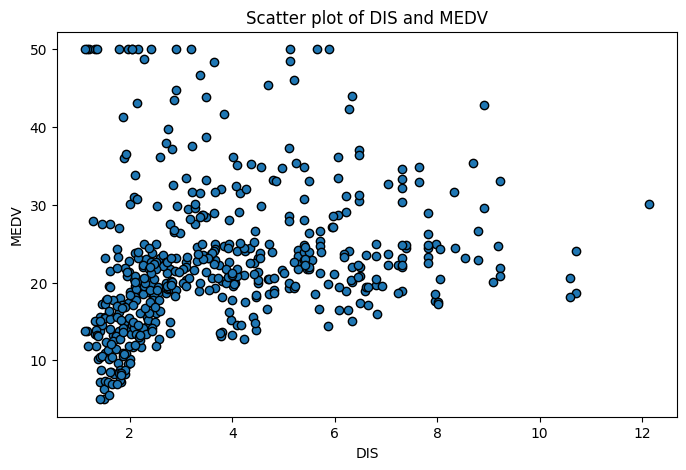

In [30]:
fig = plt.figure(figsize =(8, 5))

ax = fig.add_subplot(111)
ax.scatter(boston_df['DIS'], boston_df['MEDV'], edgecolor='black')

ax.set_title('Scatter plot of DIS and MEDV')
ax.set_xlabel('DIS')
ax.set_ylabel('MEDV')

In [29]:
X = boston_df['DIS']
y = boston_df['MEDV']

sm.add_constant(X)
model = sm.OLS(y, X).fit()
pred = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):                   1.52e-146
Time:                        17:30:15   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Answer: Since the P-Value is less than 0.05, we can reject the null hypothesis and conclude that there is a significant relationship between DIS and MEDV value.

#### The relationship signifies that a unit increase in DIS will cause the MEDV to increase by sqrt(0.732). -- computed from R square (Pearson Correlation value.)